# Description
Notebook to is in response to comments 2.6, 3.7

Repeat the expnasion using acyl(acetyl)-phosphate, poly(pyro)phosphate, and glycerol-phosphate as early coupling agents

### Load models with alterntive phosphate coupling

In [3]:
import networkExpansionPy.lib as ne
import numpy as np
import pandas as pd
import pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr,mannwhitneyu
from statsmodels.stats.multitest import multipletests
plt.rcParams['font.family'] = 'Arial'

import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)

def load_data(network_name):
    with open(ne.asset_path  + "/metabolic_networks/" + network_name,"rb") as filehandler:
        metabolism = pickle.load(filehandler)
    return metabolism

# load the metabolism object from the repo
#metabolism = load_data('metabolism.23Aug2022.pkl')


model1 = "metabolism.v3.1.purinePPiCoupling.pkl"
model2 = "metabolism.v3.2.purineAcPCoupling.pkl"
model3 = "metabolism.v3.3.purineG3Pcoupling.pkl"
models = [model1,model2,model3]
model_names = ["PPi","AcP","G3P"]

num_compounds = []
seed_set = pd.read_csv('../assets/seed_set.csv')['ID'].tolist() 
print('There were {N} compounds in this seed set...'.format(N=len(seed_set)))

for model,mid in list(zip(models,model_names)):
    metabolism = pd.read_pickle('/Users/joshuagoldford/Documents/github/network-expansion-assets/models/{m}'.format(m=model))
    cids = metabolism.coenzymes
    ne_cpds,ne_rxns = metabolism.expand(seed_set,algorithm='trace')
    print('There were {N} compounds produced in this expansion!'.format(N=len(ne_cpds)))
    num_compounds.append(len(ne_cpds))

There were 70 compounds in this seed set...
There were 4311 compounds produced in this expansion!
There were 4311 compounds produced in this expansion!
There were 433 compounds produced in this expansion!


Text(0.5, 0, 'phosphoryl donor')

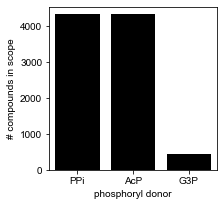

In [4]:

plt.figure(figsize=(3,3))
sns.barplot(y=num_compounds,x=model_names,color="k")
plt.ylabel('# compounds in scope')
plt.xlabel('phosphoryl donor')
#plt.savefig("revisions.v1/phosphoryl-coupling.svg")